<a href="https://colab.research.google.com/github/seyedalirezaabbaspour/Recognize-Persian-handwritten-numbers-with-keras/blob/main/CNN_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone --recursive [GITHUB LINK REPO]    

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --reference-if-able <repo>
                          reference repository
    --dissociate          use --reference only 

In [2]:
! git clone --recursive https://github.com/seyedalirezaabbaspour/Recognize-Persian-handwritten-numbers-with-keras.git

Cloning into 'Recognize-Persian-handwritten-numbers-with-keras'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 79 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (79/79), done.


In [3]:
!pwd

/content


In [4]:
! ls

Recognize-Persian-handwritten-numbers-with-keras  sample_data


In [5]:
!mv /content/Recognize-Persian-handwritten-numbers-with-keras/datasets/* /content

In [6]:
!ls

Data_hoda_full.mat  Recognize-Persian-handwritten-numbers-with-keras
dataset_hoda.py     sample_data


# **Convolutional Neural Network**

## Classification With CNN On **Hoda**(Persian Handwritten Digits)



In [7]:
import keras 
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

from dataset_hoda import load_hoda

In [8]:
#load dataset
X_train_original, y_train_original, X_test_original, y_test_original = load_hoda(training_sample_size=5000,
                                                                                 test_sample_size=1000,
                                                                                 size = 28)

#preprocessing

''' input data in numpy array format'''
X_train = np.array(X_train_original)
X_test = np.array(X_test_original)


''' normalize our data values to the range [0, 1]'''
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train/ 255.0
X_test = X_test  / 255.0

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# preprocessing class labels
y_train = keras.utils.to_categorical(y_train_original)
y_test = keras.utils.to_categorical(y_test_original)


# test and validation set
X_validation = X_train[:1000]
y_validation = y_train[:1000]

X_train = X_train[1000:]
y_train = y_train[1000:]


#preprocessing

''' input data in numpy array format'''
X_train = np.array(X_train_original)
X_test = np.array(X_test_original)


''' normalize our data values to the range [0, 1]'''
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train/ 255.0
X_test = X_test  / 255.0

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# preprocessing class labels
y_train = keras.utils.to_categorical(y_train_original)
y_test = keras.utils.to_categorical(y_test_original)

In [9]:
# 5. Define model architecture

model = Sequential()
model.add(Conv2D(64, (4, 4),activation = "relu", padding = "same" , input_shape = (28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.6))
model.add(Conv2D(128, (4, 4), activation = "relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.6))
model.add(Conv2D(256, (4, 4), activation="relu", padding= "same"))
model.add(Dropout(0.6))
model.add(Conv2D(512, (4, 4), activation="relu", padding= "same"))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         5

Epoch 1/150
25/25 [==============================] - 35s 158ms/step - loss: 2.0355 - acc: 0.2557 - val_loss: 0.7013 - val_acc: 0.7870
Epoch 2/150
25/25 [==============================] - 3s 137ms/step - loss: 0.6820 - acc: 0.7623 - val_loss: 0.2113 - val_acc: 0.9480
Epoch 3/150
25/25 [==============================] - 3s 138ms/step - loss: 0.3201 - acc: 0.8965 - val_loss: 0.1369 - val_acc: 0.9730
Epoch 4/150
25/25 [==============================] - 3s 137ms/step - loss: 0.2399 - acc: 0.9236 - val_loss: 0.0727 - val_acc: 0.9810
Epoch 5/150
25/25 [==============================] - 3s 138ms/step - loss: 0.1650 - acc: 0.9506 - val_loss: 0.0579 - val_acc: 0.9810
Epoch 6/150
25/25 [==============================] - 3s 138ms/step - loss: 0.1310 - acc: 0.9600 - val_loss: 0.0498 - val_acc: 0.9880
Epoch 7/150
25/25 [==============================] - 3s 138ms/step - loss: 0.1118 - acc: 0.9656 - val_loss: 0.0419 - val_acc: 0.9850
Epoch 8/150
25/25 [==============================] - 3s 139ms/step -

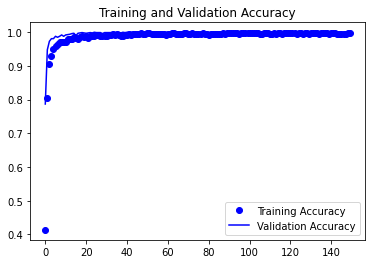

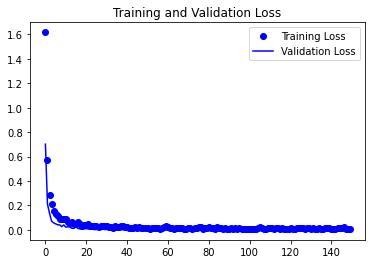

In [10]:
# Compile Model
adam = Adam(lr = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer=adam, metrics=["acc"])


# Fit Model on Training Data
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          shuffle=True, 
          epochs=150, 
          batch_size=200)

loss, acc = model.evaluate(X_test, y_test)

print(f"\nTest Loss : {loss:.4f} Test Accuracy : {acc:.4f}")

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()